In [18]:
pip install git+https://gitlab.com/IvanSeleznov/ofsca.git@v1.2

  Cloning https://gitlab.com/IvanSeleznov/ofsca.git (to revision v1.2) to /tmp/pip-req-build-xy97770p
  Running command git clone --filter=blob:none --quiet https://gitlab.com/IvanSeleznov/ofsca.git /tmp/pip-req-build-xy97770p
  Running command git checkout -b v1.2 --track origin/v1.2
  Switched to a new branch 'v1.2'
  Branch 'v1.2' set up to track remote branch 'v1.2' from 'origin'.
  Resolved https://gitlab.com/IvanSeleznov/ofsca.git to commit 176dd3c5eaf98cef66cbd6135361a47ee9928163
  Preparing metadata (setup.py) ... done
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you

In [19]:
# import ofsca.examples.numerical_example as ofsca_numerical_example
# import matplotlib.pyplot as plt

In [20]:
# fig = ofsca_numerical_example.example_numerical()
# plt.tight_layout()
# plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from os import walk
import numpy as np
import matplotlib.animation as animation
import pandas.io.json as pd_json
import json
import statistics as stats
from scipy.stats import mannwhitneyu
from scipy.spatial import distance as dist
from scipy.signal import find_peaks
from ofsca import ofsca

In [22]:
df = pd.read_csv("../preprocessed.csv")
df['BPOGX'] = df['BPOGX'].apply(lambda x: json.loads(x))
df['BPOGY'] = df['BPOGY'].apply(lambda x: json.loads(x))
df['X_HEAD'] = df['X_HEAD'].apply(lambda x: json.loads(x))
df['Y_HEAD'] = df['Y_HEAD'].apply(lambda x: json.loads(x))
df['Left_EAR'] = df['Left_EAR'].apply(lambda x: json.loads(x))
df['Right_EAR'] = df['Right_EAR'].apply(lambda x: json.loads(x))
df.head()

,Session_id,BPOGX,BPOGY,X_HEAD,Y_HEAD,Left_EAR,Right_EAR,Valid_data,Session_desc,Duration_sec,Screen_width,Screen_height,Screen_ratio,Read_score
0,0vDqTTS4iDY6DF5NOp8f,"[-35.0, 0.2, 48.9, 88.0, 126.2, 146.3, 143.1, ...","[140.8, 140.3, 141.0, 140.6, 138.8, 137.2, 126...","[337.6, 337.6, 337.7, 337.7, 337.7, 337.7, 337...","[232.9, 233.2, 233.2, 233.8, 234.2, 234.6, 234...","[0.2674451799752718, 0.27079599090421286, 0.27...","[0.2689971512106712, 0.2739457931430057, 0.273...",1.000000,Normal Scan,273.000000,1366,768,1.0,NaN
1,IxFK072TVWPwYlGys7rw,"[30.6, 82.9, 142.8, 184.7, 229.8, 283.6, 307.3...","[158.2, 154.7, 146.6, 132.5, 119.8, 135.6, 160...","[375.6, 375.6, 375.2, 375.0, 374.8, 374.0, 373...","[187.1, 187.1, 186.8, 186.6, 186.4, 185.7, 185...","[0.30578224946715343, 0.3036632957740208, 0.30...","[0.31399477302244283, 0.311637494201671, 0.308...",1.000000,Normal Read,185.500000,1366,768,1.0,4.0
2,2N0kUSJASI5JIwtMnJ6Z,"[1242.9, 1260.6, 1243.1, 1222.5, 1206.1, 1169....","[319.1, 354.4, 394.2, 420.2, 421.9, 407.6, 386...","[387.3, 387.5, 387.6, 387.8, 387.8, 388.1, 388...","[282.8, 282.4, 282.3, 282.6, 282.9, 282.7, 282...","[0.2856657845954178, 0.30383374679610287, 0.32...","[0.2701253622005843, 0.29151688541896625, 0.30...",0.999344,Normal Scan,304.766667,1280,720,1.5,NaN
3,eVx48oKwJpOecNEasAHf,"[679.6, 692.7, 698.4, 711.4, 746.1, 843.4, 100...","[110.3, 107.4, 102.8, 109.5, 115.4, 132.1, 88....","[366.1, 366.2, 366.3, 366.2, 366.3, 366.3, 366...","[263.7, 263.5, 263.3, 263.4, 263.3, 263.4, 264...","[0.3957240980047987, 0.39914164696993815, 0.39...","[0.3725824761599151, 0.3758964732728201, 0.375...",0.999872,Normal Read,518.866667,1280,720,1.5,4.0
4,qxdzibb5ytmZyniXGkN2,"[2806.5, 3401.2, 4244.1, 4703.6, 4860.1, 4774....","[1791.8, 1902.1, 2050.6, 2048.4, 2019.7, 1909....","[305.2, 304.6, 304.8, 304.4, 303.5, 303.3, 303...","[118.3, 118.4, 118.6, 120.2, 120.8, 119.7, 119...","[0.24825234627034098, 0.25869110605008805, 0.2...","[0.2635056361606525, 0.2699883340867812, 0.265...",0.950809,Normal Scan,96.000000,1440,900,2.0,NaN


In [23]:
def indices_condition(arr, thr):
    negative_mask = arr < 0
    greater_than_mask = arr > thr
    
    combined_mask = np.logical_or(negative_mask, greater_than_mask)
    indices = np.where(combined_mask)
    
    return indices

def filter_coordinates(row):
    screen_width = row['Screen_width']
    screen_height = row['Screen_height']
    x = np.array(row['BPOGX'])
    y = np.array(row['BPOGY'])
    x_invalid = indices_condition(x, screen_width)
    y_invalid = indices_condition(y, screen_height)
    combined_indices = np.concatenate((x_invalid, y_invalid), axis=1)
    x_valid = np.delete(x, combined_indices)
    y_valid = np.delete(y, combined_indices)
    valid_ratio = len(x_valid) / len(x)
    valid_dur = row['Duration_sec'] * valid_ratio
    return x_valid, y_valid, valid_dur

# Apply the function to each row
df['Filtered_BPOGX'], df['Filtered_BPOGY'], df['Valid_duration'] = zip(*df.apply(filter_coordinates, axis=1))
df.head()

,Session_id,BPOGX,BPOGY,X_HEAD,Y_HEAD,Left_EAR,Right_EAR,Valid_data,Session_desc,Duration_sec,Screen_width,Screen_height,Screen_ratio,Read_score,Filtered_BPOGX,Filtered_BPOGY,Valid_duration
0,0vDqTTS4iDY6DF5NOp8f,"[-35.0, 0.2, 48.9, 88.0, 126.2, 146.3, 143.1, ...","[140.8, 140.3, 141.0, 140.6, 138.8, 137.2, 126...","[337.6, 337.6, 337.7, 337.7, 337.7, 337.7, 337...","[232.9, 233.2, 233.2, 233.8, 234.2, 234.6, 234...","[0.2674451799752718, 0.27079599090421286, 0.27...","[0.2689971512106712, 0.2739457931430057, 0.273...",1.000000,Normal Scan,273.000000,1366,768,1.0,NaN,"[0.2, 48.9, 88.0, 126.2, 146.3, 143.1, 134.2, ...","[140.3, 141.0, 140.6, 138.8, 137.2, 126.7, 124...",214.200000
1,IxFK072TVWPwYlGys7rw,"[30.6, 82.9, 142.8, 184.7, 229.8, 283.6, 307.3...","[158.2, 154.7, 146.6, 132.5, 119.8, 135.6, 160...","[375.6, 375.6, 375.2, 375.0, 374.8, 374.0, 373...","[187.1, 187.1, 186.8, 186.6, 186.4, 185.7, 185...","[0.30578224946715343, 0.3036632957740208, 0.30...","[0.31399477302244283, 0.311637494201671, 0.308...",1.000000,Normal Read,185.500000,1366,768,1.0,4.0,"[30.6, 82.9, 142.8, 184.7, 229.8, 283.6, 307.3...","[158.2, 154.7, 146.6, 132.5, 119.8, 135.6, 160...",173.933333
2,2N0kUSJASI5JIwtMnJ6Z,"[1242.9, 1260.6, 1243.1, 1222.5, 1206.1, 1169....","[319.1, 354.4, 394.2, 420.2, 421.9, 407.6, 386...","[387.3, 387.5, 387.6, 387.8, 387.8, 388.1, 388...","[282.8, 282.4, 282.3, 282.6, 282.9, 282.7, 282...","[0.2856657845954178, 0.30383374679610287, 0.32...","[0.2701253622005843, 0.29151688541896625, 0.30...",0.999344,Normal Scan,304.766667,1280,720,1.5,NaN,"[1242.9, 1260.6, 1243.1, 1222.5, 1206.1, 1169....","[319.1, 354.4, 394.2, 420.2, 421.9, 407.6, 386...",269.133333
3,eVx48oKwJpOecNEasAHf,"[679.6, 692.7, 698.4, 711.4, 746.1, 843.4, 100...","[110.3, 107.4, 102.8, 109.5, 115.4, 132.1, 88....","[366.1, 366.2, 366.3, 366.2, 366.3, 366.3, 366...","[263.7, 263.5, 263.3, 263.4, 263.3, 263.4, 264...","[0.3957240980047987, 0.39914164696993815, 0.39...","[0.3725824761599151, 0.3758964732728201, 0.375...",0.999872,Normal Read,518.866667,1280,720,1.5,4.0,"[679.6, 692.7, 698.4, 711.4, 746.1, 843.4, 100...","[110.3, 107.4, 102.8, 109.5, 115.4, 132.1, 88....",439.200000
4,qxdzibb5ytmZyniXGkN2,"[2806.5, 3401.2, 4244.1, 4703.6, 4860.1, 4774....","[1791.8, 1902.1, 2050.6, 2048.4, 2019.7, 1909....","[305.2, 304.6, 304.8, 304.4, 303.5, 303.3, 303...","[118.3, 118.4, 118.6, 120.2, 120.8, 119.7, 119...","[0.24825234627034098, 0.25869110605008805, 0.2...","[0.2635056361606525, 0.2699883340867812, 0.265...",0.950809,Normal Scan,96.000000,1440,900,2.0,NaN,"[1435.8, 1189.8, 989.6, 787.2, 670.0, 522.0, 3...","[551.6, 492.7, 463.5, 444.1, 432.9, 466.9, 492...",47.533333


# Spectral Analysis

In [37]:
def fft_and_plot(x, y, fr, to_plot=False):
    sp = np.fft.fft(y)
    freq = np.fft.fftfreq(n=x.shape[-1], d=1/fr)
    if to_plot:
        plt.figure(figsize=(9, 6))
        plt.title("Signal")
        plt.xlabel("Time, s")
        plt.ylabel("Amplitude, Volts")
        plt.plot(x, y, color='blue')
        plt.show()
    
    
        plt.figure(figsize=(9, 6))
        plt.stem(freq, np.abs(sp * 2 / len(freq)))
        plt.xlim(0,)
        plt.title("Amplitude spectrum")
        plt.xlabel("Frequency, Hz")
        plt.ylabel("FFT Amplitude, Volts")
        plt.show()
    
    positive_indices = freq >= 0
    sorted_indices = np.argsort(freq[positive_indices])
    sorted_freq = freq[sorted_indices]
    sorted_sp = np.abs(sp * 2 / len(freq))[sorted_indices]
    x1, x2, x3 = np.array_split(sorted_sp, 3)
    return x1.sum(), x2.sum(), x3.sum()
# np.mean(np.abs(sp * 2 / len(freq))), np.min(np.abs(sp * 2 / len(freq))), np.max(np.abs(sp * 2 / len(freq)))


def fft_head_trajectory(session_id, col1, col2):
    x = df.loc[df['Session_id'] == session_id, col1].tolist()[0]
    y = df.loc[df['Session_id'] == session_id, col2].tolist()[0]

    dur = df.loc[df['Session_id'] == session_id, 'Duration_sec'].tolist()[0]
    fr = len(x) / dur
    t = np.arange(0, dur, 1/fr)
    
    x1, x2, x3 = fft_and_plot(np.linspace(0, (len(x)-1) / fr, len(x)), np.array(x), fr)
    y1, y2, y3 = fft_and_plot(np.linspace(0, (len(y)-1) / fr, len(y)), np.array(y), fr)
    return x1, x2, x3, y1, y2, y3

ear_spectrum = ["Low_sp_l_EAR", "Med_sp_l_EAR", "High_sp_l_EAR", "Low_sp_r_EAR", "Med_sp_r_EAR", "High_sp_r_EAR"]
eye_spectrum = ["Low_sp_x_eye", "Med_sp_x_eye", "High_sp_x_eye", "Low_sp_y_eye", "Med_sp_y_eye", "High_sp_y_eye"]
head_spectrum = ["Low_sp_x_head", "Med_sp_x_head", "High_sp_x_head", "Low_sp_y_head", "Med_sp_y_head", "High_sp_y_head"]

df[ear_spectrum] = df["Session_id"].apply(lambda x: pd.Series(fft_head_trajectory(x, "Left_EAR", "Right_EAR")))
df[eye_spectrum] = df["Session_id"].apply(lambda x: pd.Series(fft_head_trajectory(x, "Filtered_BPOGX", "Filtered_BPOGY")))
df[head_spectrum] = df["Session_id"].apply(lambda x: pd.Series(fft_head_trajectory(x, "X_HEAD", "Y_HEAD")))


# fft_head_trajectory('0vDqTTS4iDY6DF5NOp8f')

In [25]:
df

,Session_id,BPOGX,BPOGY,X_HEAD,Y_HEAD,Left_EAR,Right_EAR,Valid_data,Session_desc,Duration_sec,...,High_sp_x_eye,Low_sp_y_eye,Med_sp_y_eye,High_sp_y_eye,Low_sp_x_head,Med_sp_x_head,High_sp_x_head,Low_sp_y_head,Med_sp_y_head,High_sp_y_head
0,0vDqTTS4iDY6DF5NOp8f,"[-35.0, 0.2, 48.9, 88.0, 126.2, 146.3, 143.1, ...","[140.8, 140.3, 141.0, 140.6, 138.8, 137.2, 126...","[337.6, 337.6, 337.7, 337.7, 337.7, 337.7, 337...","[232.9, 233.2, 233.2, 233.8, 234.2, 234.6, 234...","[0.2674451799752718, 0.27079599090421286, 0.27...","[0.2689971512106712, 0.2739457931430057, 0.273...",1.000000,Normal Scan,273.000000,...,448.314875,3910.801242,294.458891,201.369677,754.350372,3.867108,2.661233,545.369819,4.872597,2.920385
1,IxFK072TVWPwYlGys7rw,"[30.6, 82.9, 142.8, 184.7, 229.8, 283.6, 307.3...","[158.2, 154.7, 146.6, 132.5, 119.8, 135.6, 160...","[375.6, 375.6, 375.2, 375.0, 374.8, 374.0, 373...","[187.1, 187.1, 186.8, 186.6, 186.4, 185.7, 185...","[0.30578224946715343, 0.3036632957740208, 0.30...","[0.31399477302244283, 0.311637494201671, 0.308...",1.000000,Normal Read,185.500000,...,212.775821,3946.562792,238.750928,159.319841,795.044606,3.948930,2.718047,463.110842,3.524673,2.444544
2,2N0kUSJASI5JIwtMnJ6Z,"[1242.9, 1260.6, 1243.1, 1222.5, 1206.1, 1169....","[319.1, 354.4, 394.2, 420.2, 421.9, 407.6, 386...","[387.3, 387.5, 387.6, 387.8, 387.8, 388.1, 388...","[282.8, 282.4, 282.3, 282.6, 282.9, 282.7, 282...","[0.2856657845954178, 0.30383374679610287, 0.32...","[0.2701253622005843, 0.29151688541896625, 0.30...",0.999344,Normal Scan,304.766667,...,291.258548,4168.685038,401.492925,215.991732,870.763763,4.669314,3.428590,657.772693,3.775857,2.528532
3,eVx48oKwJpOecNEasAHf,"[679.6, 692.7, 698.4, 711.4, 746.1, 843.4, 100...","[110.3, 107.4, 102.8, 109.5, 115.4, 132.1, 88....","[366.1, 366.2, 366.3, 366.2, 366.3, 366.3, 366...","[263.7, 263.5, 263.3, 263.4, 263.3, 263.4, 264...","[0.3957240980047987, 0.39914164696993815, 0.39...","[0.3725824761599151, 0.3758964732728201, 0.375...",0.999872,Normal Read,518.866667,...,279.974086,4356.670048,418.341548,218.660791,831.124284,3.742626,2.746928,602.692208,5.059317,3.284122
4,qxdzibb5ytmZyniXGkN2,"[2806.5, 3401.2, 4244.1, 4703.6, 4860.1, 4774....","[1791.8, 1902.1, 2050.6, 2048.4, 2019.7, 1909....","[305.2, 304.6, 304.8, 304.4, 303.5, 303.3, 303...","[118.3, 118.4, 118.6, 120.2, 120.8, 119.7, 119...","[0.24825234627034098, 0.25869110605008805, 0.2...","[0.2635056361606525, 0.2699883340867812, 0.265...",0.950809,Normal Scan,96.000000,...,631.905021,4017.534850,530.063157,297.901178,838.626923,59.527843,26.040013,505.030201,73.482098,48.451371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,cClGkJjNGafOrZhRrvPr,"[-419.6, -275.2, -107.1, 80.6, 261.5, 424.5, 5...","[137.2, 173.6, 204.7, 231.6, 254.1, 272.9, 282...","[358.8, 356.6, 354.0, 351.2, 348.2, 345.2, 341...","[290.2, 291.4, 292.3, 293.1, 293.6, 293.9, 294...","[0.33123619050575726, 0.31166781869992227, 0.3...","[0.35456984074395026, 0.3299889906679672, 0.31...",0.986570,Concussion Scan,298.733333,...,338.722620,4834.288117,424.815007,245.190585,1029.590778,63.799164,57.189021,1033.701952,55.554734,29.183260
81,5n0g1LGcORhAO1DXcLQk,"[411.1, 350.4, 354.0, 424.0, 540.2, 679.2, 829...","[1182.7, 1206.6, 1164.0, 1053.5, 912.0, 775.9,...","[339.2, 339.2, 339.1, 338.8, 338.7, 338.3, 338...","[223.0, 222.6, 222.0, 221.7, 221.3, 220.9, 220...","[0.24336867893246128, 0.2828682661507857, 0.32...","[0.23018215921638271, 0.26572853151094705, 0.3...",0.994866,Normal Scan,122.733333,...,198.773603,4361.259859,276.206629,157.567244,716.656710,6.680146,4.741691,520.226389,3.045572,2.139464
82,Tu0xsSHZFpHueJ5gJnFx,"[881.4, 855.1, 841.1, 832.9, 816.7, 819.8, 826...","[403.6, 385.6, 386.1, 402.5, 423.2, 451.7, 486...","[330.9, 330.9, 330.9, 331.0, 331.0, 331.1, 331...","[227.0, 226.9, 226.9, 226.9, 227.0, 227.0, 226...","[0.39892998812532676, 0.3986906270913094, 0.39...","[0.3879577188066983, 0.3833704685304086, 0.377...",1.000

In [9]:
def stat_test(col):
    normal_read_sp = df[df["Session_desc"] == "Normal Read"][col].to_list()
    conc_read_sp = df[df["Session_desc"] == "Concussion Read"][col].to_list()

    normal_scan_sp = df[df["Session_desc"] == "Normal Scan"][col].to_list()
    conc_scan_sp = df[df["Session_desc"] == "Concussion Scan"][col].to_list()

    U1, p = mannwhitneyu(normal_scan_sp, conc_scan_sp)
    print(U1, p)
    
    U1, p = mannwhitneyu(normal_read_sp, conc_read_sp)
    print(U1, p)
    
stat_test("Low_sp_x")
stat_test("Med_sp_x")
stat_test("High_sp_x")
stat_test("Low_sp_y")
stat_test("Med_sp_y")
stat_test("High_sp_y")

215.0 0.49493029250836496
144.0 0.023752326058843788
176.0 0.15770161720820575
140.0 0.018751478440886565
187.0 0.23441985586662173
151.0 0.03519095514515022
188.0 0.24229108287736245
128.0 0.008758660844393256
174.0 0.14576257012534277
147.0 0.028200900593772636
175.0 0.15165401262622896
157.0 0.048282947217309566


In [31]:
df.head()

,Session_id,BPOGX,BPOGY,X_HEAD,Y_HEAD,Left_EAR,Right_EAR,Valid_data,Session_desc,Duration_sec,Screen_width,Screen_height,Screen_ratio,Read_score,Low_sp_x,Med_sp_x,High_sp_x,Low_sp_y,Med_sp_y,High_sp_y
0,0vDqTTS4iDY6DF5NOp8f,"[-35.0, 0.2, 48.9, 88.0, 126.2, 146.3, 143.1, ...","[140.8, 140.3, 141.0, 140.6, 138.8, 137.2, 126...","[337.6, 337.6, 337.7, 337.7, 337.7, 337.7, 337...","[232.9, 233.2, 233.2, 233.8, 234.2, 234.6, 234...","[8.012739717661487, 8.109876532221474, 8.10987...","[8.15061368168334, 8.300602737686408, 8.301528...",1.000000,Normal Scan,273.000000,1366,768,1.0,NaN,29.094609,1.941598,1.484536,28.350722,1.882763,1.526312
1,IxFK072TVWPwYlGys7rw,"[30.6, 82.9, 142.8, 184.7, 229.8, 283.6, 307.3...","[158.2, 154.7, 146.6, 132.5, 119.8, 135.6, 160...","[375.6, 375.6, 375.2, 375.0, 374.8, 374.0, 373...","[187.1, 187.1, 186.8, 186.6, 186.4, 185.7, 185...","[10.151970682309491, 10.051255090120078, 10.00...","[10.56707878471892, 10.517153678656605, 10.414...",1.000000,Normal Read,185.500000,1366,768,1.0,4.0,30.822163,1.421710,1.151251,30.905402,1.421954,1.158939
2,2N0kUSJASI5JIwtMnJ6Z,"[1242.9, 1260.6, 1243.1, 1222.5, 1206.1, 1169....","[319.1, 354.4, 394.2, 420.2, 421.9, 407.6, 386...","[387.3, 387.5, 387.6, 387.8, 387.8, 388.1, 388...","[282.8, 282.4, 282.3, 282.6, 282.9, 282.7, 282...","[7.255967161927883, 7.808527292659857, 8.35516...","[7.463725557322996, 8.115957837119044, 8.61767...",0.999344,Normal Scan,304.766667,1280,720,1.5,NaN,55.362605,3.377242,2.250768,54.847822,3.361566,2.249904
3,eVx48oKwJpOecNEasAHf,"[679.6, 692.7, 698.4, 711.4, 746.1, 843.4, 100...","[110.3, 107.4, 102.8, 109.5, 115.4, 132.1, 88....","[366.1, 366.2, 366.3, 366.2, 366.3, 366.3, 366...","[263.7, 263.5, 263.3, 263.4, 263.3, 263.4, 264...","[10.650934497823698, 10.70302624389015, 10.701...","[10.875962646288965, 10.975726449477193, 10.97...",0.999872,Normal Read,518.866667,1280,720,1.5,4.0,54.740775,3.864238,2.671565,55.582976,4.041547,2.763454
4,qxdzibb5ytmZyniXGkN2,"[2806.5, 3401.2, 4244.1, 4703.6, 4860.1, 4774....","[1791.8, 1902.1, 2050.6, 2048.4, 2019.7, 1909....","[305.2, 304.6, 304.8, 304.4, 303.5, 303.3, 303...","[118.3, 118.4, 118.6, 120.2, 120.8, 119.7, 119...","[6.50496945054821, 6.804805498505903, 6.651887...","[6.762706721067935, 7.015801543061951, 6.90376...",0.950809,Normal Scan,96.000000,1440,900,2.0,NaN,71.319109,12.457552,9.112363,73.175885,12.861304,9.428488


In [72]:
df_fix = pd.read_csv("../fixations.csv")
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   session_id       85 non-null     object 
 1   group            85 non-null     object 
 2   task             85 non-null     object 
 3   fixation_number  85 non-null     int64  
 4   fixation_length  85 non-null     float64
 5   fixation_ratio   85 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.1+ KB


In [73]:
df_fix = pd.merge(df, df_fix, left_on="Session_id", right_on="session_id")
# df_fix = df_fix1[['Session_id', 'task', 'group', 'fixation_number', 'fixation_length', 'fixation_ratio', 'Low_sp_x', 'Med_sp_x', 'High_sp_x', 'Low_sp_y', 'Med_sp_y', 'High_sp_y']]
df_fix = df_fix.drop(['BPOGX', 'BPOGY', 'X_HEAD', 'Y_HEAD', 'Left_EAR',
       'Right_EAR', 'Valid_data', 'Session_desc', 'Duration_sec',
       'Screen_width', 'Screen_height', 'Screen_ratio', 'Read_score',
       'Filtered_BPOGX', 'Filtered_BPOGY', 'Valid_duration', 'session_id'], axis=1)
df_fix.columns

Index(['Session_id', 'Low_sp_l_EAR', 'Med_sp_l_EAR', 'High_sp_l_EAR',
       'Low_sp_r_EAR', 'Med_sp_r_EAR', 'High_sp_r_EAR', 'Low_sp_x_eye',
       'Med_sp_x_eye', 'High_sp_x_eye', 'Low_sp_y_eye', 'Med_sp_y_eye',
       'High_sp_y_eye', 'Low_sp_x_head', 'Med_sp_x_head', 'High_sp_x_head',
       'Low_sp_y_head', 'Med_sp_y_head', 'High_sp_y_head', 'group', 'task',
       'fixation_number', 'fixation_length', 'fixation_ratio'],
      dtype='object')

In [75]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

def classify_df_models(df, features, prints_on=False):
    svm_m = SVC(kernel='linear')
    lr_m = LogisticRegression()
    rf_m = RandomForestClassifier()
    dt_m = DecisionTreeClassifier()
    xgb_m = xgb.XGBClassifier(tree_method="hist")

    models = {'SVM': svm_m, \
              'Logistic Regression': lr_m, \
             'Random Forest': rf_m, \
             'Decision Tree': dt_m, \
              'XGBoost': xgb_m}

    X = df[features]
    y = df['group']

    # Encode the target variable into binary format
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # One-hot encode categorical features
    X_encoded = pd.get_dummies(X)

    # Split into train/validation and test sets

    X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    smote = SMOTE(random_state=42)

    for model_name, model in models.items():
        print(f"\nResults for {model_name}\n")

        # Lists to store results for each fold
        conf_matrices = []
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        aucs = []
        cv_scores_acc = []
        cv_scores_f1 = []
        best_model = None
        best_f1 = 0

        for train_index, test_index in cv.split(X_train_val, y_train_val):
            X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
            y_train, y_test = y_train_val[train_index], y_train_val[test_index]

            # Apply SMOTE to balance the training set for each fold
            X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

            # Fit the model on the balanced training set
            model.fit(X_resampled, y_resampled)

            # Predict on the test set and calculate scores
            if model_name in ("SVM", "Logistic Regression"):
                y_pred = model.decision_function(X_test)
            elif model_name in ("Random Forest", "Decision Tree", "XGBoost"):
                y_pred = model.predict(X_test)
            fold_accuracy = accuracy_score(y_test, y_pred > 0)
            cv_scores_acc.append(fold_accuracy)
            fold_f1 = f1_score(y_test, y_pred > 0)
            cv_scores_f1.append(fold_f1)

            # Check if the metric is best for the current model and save it
            if fold_f1 > best_f1:
                best_f1 = fold_f1
                best_model = deepcopy(model)

            # Calculate confusion matrix for this fold
            conf_matrix = confusion_matrix(y_test, y_pred > 0)
            conf_matrices.append(conf_matrix)

            # Calculate ROC curve and AUC for this fold
            fpr, tpr, _ = roc_curve(y_test, y_pred)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)

        # Aggregate results across folds
        mean_conf_matrix = np.mean(conf_matrices, axis=0)
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        if prints_on:
            # Plot ROC curve
            plt.figure()
            plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='r', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
            plt.legend(loc='lower right')
            plt.show()

            print("Mean Confusion Matrix:")
            print(mean_conf_matrix)

            cv_scores_acc = np.array(cv_scores_acc)
            cv_scores_f1 = np.array(cv_scores_f1)

            print("Cross-validation Accuracy Scores:", cv_scores_acc)
            print("Mean Accuracy:", cv_scores_acc.mean())

            print("Cross-validation f1 Scores:", cv_scores_f1)
            print("Mean f1:", cv_scores_f1.mean())

        # Predict for test set
        if model_name in ("SVM", "Logistic Regression"):
            y_pred = best_model.decision_function(X_test_main)
        elif model_name in ("Random Forest", "Decision Tree", "XGBoost"):
            y_pred = best_model.predict(X_test_main)
        test_accuracy = accuracy_score(y_test_main, y_pred > 0)
        test_f1 = f1_score(y_test_main, y_pred > 0)
        print("F1 Test:", test_f1)
        
        if prints_on:
            print("Accuracy Test:", test_accuracy)
            print(conf_matrix)
            
            conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
            fpr, tpr, _ = roc_curve(y_test_main, y_pred)
            roc_auc = auc(fpr, tpr)

            precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

            # Plot Precision-Recall curve for test
            plt.figure()
            plt.plot(recall, precision, color='b')
            plt.plot([0, 0], [0, 0], color='r', linestyle='--')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve: Test')
            # plt.legend(loc='lower right')
            plt.show()

            # Plot ROC curve for test
            plt.figure()
            plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='r', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
            plt.legend(loc='lower right')
            plt.show()

        if model_name in ("SVM", "Logistic Regression"):
            importances = best_model.coef_[0]
        elif model_name in ("Random Forest", "Decision Tree", "XGBoost"):
            importances = list(best_model.feature_importances_)

        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train_val.columns, importances)]
        sorted_feature_importance = sorted(feature_importances, key = lambda x: x[1], reverse = True)
        print("Feature Importance:")
        for feature, importance in sorted_feature_importance:
            print(f"{feature}: {importance}")

# classify_df_models(df_fix_read, ['fixation_number', 'fixation_length', 'fixation_ratio', 'Read_score'])
classify_df_models(df_fix, ['task', 'fixation_number', 'fixation_length', 'fixation_ratio'] + ear_spectrum)


Results for SVM

F1 Test: 0.6666666666666666
Feature Importance:
task_Read: 0.44
fixation_number: -0.0
fixation_length: 0.0
fixation_ratio: -0.15
High_sp_r_EAR: -0.16
High_sp_l_EAR: -0.2
Med_sp_r_EAR: -0.23
Med_sp_l_EAR: -0.3
Low_sp_l_EAR: -0.44
task_Scan: -0.44
Low_sp_r_EAR: -0.47

Results for Logistic Regression

F1 Test: 0.6666666666666666
Feature Importance:
task_Scan: 0.45
task_Read: 0.44
High_sp_r_EAR: 0.13
fixation_number: -0.0
fixation_length: 0.0
High_sp_l_EAR: -0.0
Med_sp_r_EAR: -0.04
Low_sp_l_EAR: -0.1
Med_sp_l_EAR: -0.13
fixation_ratio: -0.15
Low_sp_r_EAR: -0.81

Results for Random Forest



/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

F1 Test: 0.7999999999999999
Feature Importance:
fixation_ratio: 0.27
fixation_length: 0.21
Med_sp_r_EAR: 0.09
fixation_number: 0.08
Med_sp_l_EAR: 0.08
Low_sp_r_EAR: 0.08
Low_sp_l_EAR: 0.07
High_sp_r_EAR: 0.05
High_sp_l_EAR: 0.04
task_Read: 0.01
task_Scan: 0.01

Results for Decision Tree

F1 Test: 0.6666666666666666
Feature Importance:
fixation_ratio: 0.49
Low_sp_l_EAR: 0.21
fixation_number: 0.12
task_Read: 0.11
High_sp_r_EAR: 0.07
fixation_length: 0.0
Med_sp_l_EAR: 0.0
High_sp_l_EAR: 0.0
Low_sp_r_EAR: 0.0
Med_sp_r_EAR: 0.0
task_Scan: 0.0

Results for XGBoost

F1 Test: 0.75
Feature Importance:
fixation_ratio: 0.3400000035762787
fixation_length: 0.20999999344348907
Med_sp_l_EAR: 0.17000000178813934
Med_sp_r_EAR: 0.07000000029802322
task_Scan: 0.05000000074505806
fixation_number: 0.03999999910593033
Low_sp_r_EAR: 0.03999999910593033
Low_sp_l_EAR: 0.029999999329447746
High_sp_l_EAR: 0.029999999329447746
High_sp_r_EAR: 0.009999999776482582
task_Read: 0.0


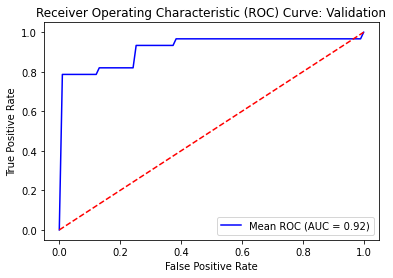

Mean Confusion Matrix:
[[7.  0.8]
 [1.  4.8]]
Cross-validation Accuracy Scores: [0.78571429 1.         0.85714286 0.84615385 0.84615385]
Mean Accuracy: 0.867032967032967
Cross-validation f1 Scores: [0.72727273 1.         0.83333333 0.8        0.83333333]
Mean f1: 0.8387878787878786


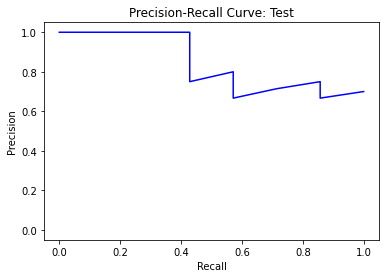

Accuracy Test: 0.8235294117647058
F1 Test: 0.7999999999999999
[[8 2]
 [1 6]]


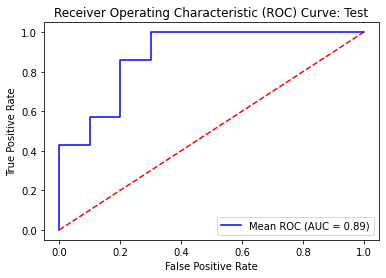

Feature Importance:
task_Read: 0.9777910206306923
task_Scan: -0.9777910206305569
Med_sp_y: 0.8560622467433179
High_sp_y: -0.6731886252565089
High_sp_x: -0.6494210415649206
Low_sp_y: -0.5929481920892385
Low_sp_x: 0.535168154266799
fixation_ratio: -0.24118329169627373
Med_sp_x: -0.013134829956994665
fixation_number: -0.005198215785640059
fixation_length: 0.004506448879055824


In [34]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

X = df_fix[['task', 'fixation_number', 'fixation_length', 'fixation_ratio', 'Low_sp_x', 'Med_sp_x', 'High_sp_x', 'Low_sp_y', 'Med_sp_y', 'High_sp_y']]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
svm_model = SVC(kernel='linear')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    svm_model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = svm_model.decision_function(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(svm_model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.decision_function(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

feature_importance = best_model.coef_[0]

# Map feature names to coefficients
feature_importance_dict = dict(zip(X_train_val.columns, feature_importance))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# OFSCA

"Could you try to estimate the OFSCA angles assuming two scaling ranges?
It would be good to assume two patterns of scaling ranges: eg. about 1 to 1.5 and about 2 to 2.5.
Then, please check whether the estimated angles are approximately the same or different in these two scaling ranges.
"

In [115]:
ofsca_dict_1 = {}

In [116]:
def save_ofsca(df, session_id, x_name, y_name, folder_to_save, start_range, end_range):
    x = df.loc[df['Session_id'] == session_id, x_name].tolist()[0]
    y = df.loc[df['Session_id'] == session_id, y_name].tolist()[0]
    group = df.loc[df['Session_id'] == session_id, "Session_desc"].tolist()[0]
    fig = ofsca_1(x, y, start_range, end_range, session_id)
    folder_path = f"../../../plots/{folder_to_save}/{group}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_name = f"{session_id}.png"
    file_path = os.path.join(folder_path, file_name)

    plt.savefig(file_path)

def ofsca_1(x, y, start_range, end_range, session_id):
    ofsca_obj = ofsca.OFSCA(x_vector=np.array(x),
                        y_vector=np.array(y),
                        order=2,
                        start_scale=start_range,
                        end_scale=end_range,
                        make_integration=True,
                        n_angles=64)
    ofsca_obj.perform_OFSCA()
    fig = ofsca_obj.get_ofsca_fig(rcParams={'font.size': 14}, alpha_graphs_ylim=[0.4, 2.8])
    
    ofsca_dict_1[session_id] = [ofsca_obj.comp1.theta, \
        ofsca_obj.comp2.theta, \
        ofsca_obj.comp1.alpha, \
        ofsca_obj.comp2.alpha]
    theta_hats_1.append(ofsca_obj.comp1.theta_hat)
    thetas_1.append(ofsca_obj.comp1.theta)
    
    theta_hats_2.append(ofsca_obj.comp2.theta_hat)
    thetas_2.append(ofsca_obj.comp2.theta)
    return fig


# session_id_1 = '0vDqTTS4iDY6DF5NOp8f'
# x = df.loc[df['Session_id'] == session_id_1, 'Filtered_BPOGX'].tolist()[0]
# y = df.loc[df['Session_id'] == session_id_1, 'Filtered_BPOGY'].tolist()[0]

sessions = df["Session_id"].unique()
processed = []
thetas_1 = []
theta_hats_1 = []
thetas_2 = []
theta_hats_2 = []

# ofsca_1(x, y, 1, 1.5)
# save_ofsca(session_id_1, 'X_HEAD', 'Y_HEAD', 'OFSCA_head_movements')

In [124]:
for i, s in enumerate(sessions):
    if i not in processed:
        try:
            save_ofsca(df, s, 'Filtered_BPOGX', 'Filtered_BPOGY', 'OFSCA_eye_2_2.5', 2, 2.5)
            processed.append(i)
            print("Processed:", len(processed))
        except ValueError:
            print(f"{s} not processed")

mne0Gu9l23zrvddMQ52T not processed
nOQRQnXCjYfEjdHkGsVt not processed


In [125]:
df_ofsca = pd.DataFrame.from_dict(ofsca_dict_1, orient='index', columns=['Comp1_theta', 'Comp2_theta', 'Comp1_alpha', 'Comp2_alpha'])
df_ofsca.reset_index(inplace=True)
df_ofsca.rename(columns={'index': 'session_id'}, inplace=True)
df_ofsca.to_csv("eye_2_25.csv", index=False)

In [107]:
thetas_1_15 = thetas_1
theta_hats_1_15 = theta_hats_1
thetas_2_15 = thetas_2
theta_hats_2_15 = theta_hats_2

In [108]:
len(thetas_1_15)

84

In [118]:
thetas_1_25 = thetas_1
theta_hats_1_25 = theta_hats_1
thetas_2_25 = thetas_2
theta_hats_2_25 = theta_hats_2

1st Component Thetas 3282.5 0.21845166926618664
2nd Component Thetas 3364.5 0.3024634116601853


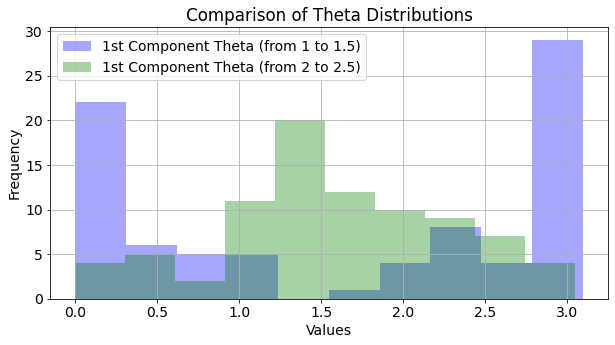

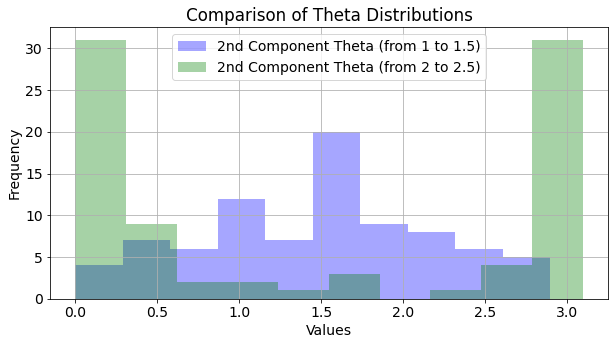

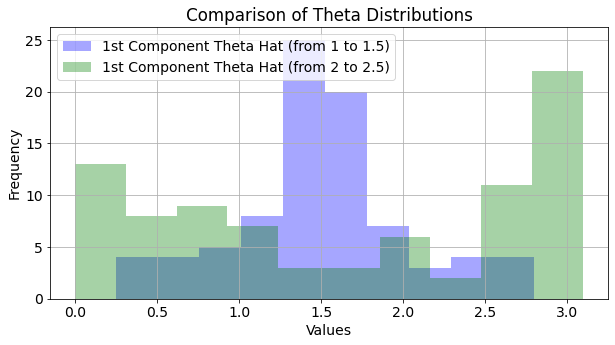

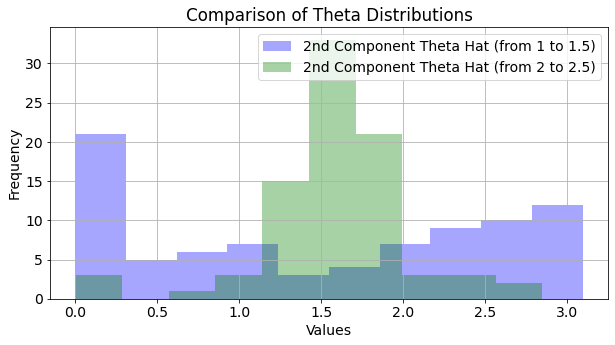

In [119]:
def plot_hist(ang_1, ang_2, label1, label2, file_name):
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.hist(ang_1, bins=10, alpha=0.35, color='blue', label=label1)
    plt.hist(ang_2, bins=10, alpha=0.35, color='green', label=label2)

    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Comparison of Theta Distributions')
    plt.legend()

    # Show plot
    plt.grid(True)
    folder_path = f"../../../plots/OFSCA_diagrams"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    file_path = os.path.join(folder_path, file_name)
    plt.savefig(file_path)
    
plot_hist(thetas_1_15, thetas_1_25, '1st Component Theta (from 1 to 1.5)', '1st Component Theta (from 2 to 2.5)', '1_comp_theta')
plot_hist(thetas_2_15, thetas_2_25, '2nd Component Theta (from 1 to 1.5)', '2nd Component Theta (from 2 to 2.5)', '2_comp_theta')
plot_hist(theta_hats_1_15, theta_hats_1_25, '1st Component Theta Hat (from 1 to 1.5)', '1st Component Theta Hat (from 2 to 2.5)', '1_comp_theta_hat')
plot_hist(theta_hats_2_15, theta_hats_2_25, '2nd Component Theta Hat (from 1 to 1.5)', '2nd Component Theta Hat (from 2 to 2.5)', '2_comp_theta_hat')

U1, p = mannwhitneyu(thetas_1_15, thetas_1_25)
print('1st Component Thetas', U1, p)
U1, p = mannwhitneyu(thetas_2_15, thetas_2_25)
print('2nd Component Thetas', U1, p)

# OFSCA Classification

In [76]:
df_ofsca_head_1 = pd.read_csv("head_1_15.csv")
df_ofsca_head_2 = pd.read_csv("head_2_25.csv")
df_ofsca_eye_1 = pd.read_csv("eye_1_15.csv")
df_ofsca_eye_2 = pd.read_csv("eye_2_25.csv")

cols_to_rename = df_ofsca_head_1.columns[1:]

df_ofsca_head_1.rename(columns={col: "Head_1" + col for col in cols_to_rename}, inplace=True)
df_ofsca_head_2.rename(columns={col: "Head_2" + col for col in cols_to_rename}, inplace=True)
df_ofsca_eye_1.rename(columns={col: "Eye_1" + col for col in cols_to_rename}, inplace=True)
df_ofsca_eye_2.rename(columns={col: "Eye_2" + col for col in cols_to_rename}, inplace=True)
# df_ofsca_eye_2
merged_df = pd.merge(df_ofsca_head_1, df_ofsca_head_2, on='session_id', how='outer')
merged_df = pd.merge(merged_df, df_ofsca_eye_1, on='session_id', how='outer')
merged_df = pd.merge(merged_df, df_ofsca_eye_2, on='session_id', how='outer')
merged_df.fillna(0, inplace=True)
df_fix = pd.merge(df_fix, merged_df, left_on="Session_id", right_on="session_id")
df_fix.columns

Index(['Session_id', 'Low_sp_l_EAR', 'Med_sp_l_EAR', 'High_sp_l_EAR',
       'Low_sp_r_EAR', 'Med_sp_r_EAR', 'High_sp_r_EAR', 'Low_sp_x_eye',
       'Med_sp_x_eye', 'High_sp_x_eye', 'Low_sp_y_eye', 'Med_sp_y_eye',
       'High_sp_y_eye', 'Low_sp_x_head', 'Med_sp_x_head', 'High_sp_x_head',
       'Low_sp_y_head', 'Med_sp_y_head', 'High_sp_y_head', 'group', 'task',
       'fixation_number', 'fixation_length', 'fixation_ratio', 'session_id',
       'Head_1Comp1_theta', 'Head_1Comp2_theta', 'Head_1Comp1_alpha',
       'Head_1Comp2_alpha', 'Head_2Comp1_theta', 'Head_2Comp2_theta',
       'Head_2Comp1_alpha', 'Head_2Comp2_alpha', 'Eye_1Comp1_theta',
       'Eye_1Comp2_theta', 'Eye_1Comp1_alpha', 'Eye_1Comp2_alpha',
       'Eye_2Comp1_theta', 'Eye_2Comp2_theta', 'Eye_2Comp1_alpha',
       'Eye_2Comp2_alpha'],
      dtype='object')

In [77]:
df_fix = df_fix.drop(['session_id'], axis=1)
df_fix.columns

Index(['Session_id', 'Low_sp_l_EAR', 'Med_sp_l_EAR', 'High_sp_l_EAR',
       'Low_sp_r_EAR', 'Med_sp_r_EAR', 'High_sp_r_EAR', 'Low_sp_x_eye',
       'Med_sp_x_eye', 'High_sp_x_eye', 'Low_sp_y_eye', 'Med_sp_y_eye',
       'High_sp_y_eye', 'Low_sp_x_head', 'Med_sp_x_head', 'High_sp_x_head',
       'Low_sp_y_head', 'Med_sp_y_head', 'High_sp_y_head', 'group', 'task',
       'fixation_number', 'fixation_length', 'fixation_ratio',
       'Head_1Comp1_theta', 'Head_1Comp2_theta', 'Head_1Comp1_alpha',
       'Head_1Comp2_alpha', 'Head_2Comp1_theta', 'Head_2Comp2_theta',
       'Head_2Comp1_alpha', 'Head_2Comp2_alpha', 'Eye_1Comp1_theta',
       'Eye_1Comp2_theta', 'Eye_1Comp1_alpha', 'Eye_1Comp2_alpha',
       'Eye_2Comp1_theta', 'Eye_2Comp2_theta', 'Eye_2Comp1_alpha',
       'Eye_2Comp2_alpha'],
      dtype='object')

In [78]:
ofsca_head_cols = [value for value in df_fix.columns if "Head" in value and "Comp" in value]
ofsca_eye_cols = [value for value in df_fix.columns if "Eye" in value and "Comp" in value]
ofsca_head_cols

['Head_1Comp1_theta',
 'Head_1Comp2_theta',
 'Head_1Comp1_alpha',
 'Head_1Comp2_alpha',
 'Head_2Comp1_theta',
 'Head_2Comp2_theta',
 'Head_2Comp1_alpha',
 'Head_2Comp2_alpha']

In [79]:
df_fix.columns

Index(['Session_id', 'Low_sp_l_EAR', 'Med_sp_l_EAR', 'High_sp_l_EAR',
       'Low_sp_r_EAR', 'Med_sp_r_EAR', 'High_sp_r_EAR', 'Low_sp_x_eye',
       'Med_sp_x_eye', 'High_sp_x_eye', 'Low_sp_y_eye', 'Med_sp_y_eye',
       'High_sp_y_eye', 'Low_sp_x_head', 'Med_sp_x_head', 'High_sp_x_head',
       'Low_sp_y_head', 'Med_sp_y_head', 'High_sp_y_head', 'group', 'task',
       'fixation_number', 'fixation_length', 'fixation_ratio',
       'Head_1Comp1_theta', 'Head_1Comp2_theta', 'Head_1Comp1_alpha',
       'Head_1Comp2_alpha', 'Head_2Comp1_theta', 'Head_2Comp2_theta',
       'Head_2Comp1_alpha', 'Head_2Comp2_alpha', 'Eye_1Comp1_theta',
       'Eye_1Comp2_theta', 'Eye_1Comp1_alpha', 'Eye_1Comp2_alpha',
       'Eye_2Comp1_theta', 'Eye_2Comp2_theta', 'Eye_2Comp1_alpha',
       'Eye_2Comp2_alpha'],
      dtype='object')

In [80]:
classify_df_models(df_fix, ['task', 'fixation_number', 'fixation_length', 'fixation_ratio'] + ofsca_eye_cols)


Results for SVM

F1 Test: 0.7999999999999999
Feature Importance:
Eye_1Comp2_theta: 1.14
task_Read: 0.54
Eye_1Comp1_alpha: 0.44
Eye_1Comp2_alpha: 0.39
Eye_1Comp1_theta: 0.15
fixation_number: -0.0
fixation_length: -0.0
fixation_ratio: -0.16
Eye_2Comp2_theta: -0.31
task_Scan: -0.54
Eye_2Comp1_theta: -0.98
Eye_2Comp2_alpha: -1.46
Eye_2Comp1_alpha: -1.72

Results for Logistic Regression

F1 Test: 0.9333333333333333
Feature Importance:
Eye_1Comp2_alpha: 1.3
Eye_1Comp1_alpha: 1.24
Eye_1Comp2_theta: 0.87
task_Read: 0.53
Eye_1Comp1_theta: 0.19
Eye_2Comp2_theta: 0.03
fixation_number: 0.0
fixation_length: -0.0
task_Scan: -0.05
fixation_ratio: -0.08
Eye_2Comp1_theta: -0.58
Eye_2Comp1_alpha: -0.68
Eye_2Comp2_alpha: -1.27

Results for Random Forest



/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

F1 Test: 0.7142857142857143
Feature Importance:
fixation_ratio: 0.23
Eye_2Comp2_alpha: 0.22
fixation_length: 0.14
Eye_2Comp1_alpha: 0.12
Eye_1Comp2_alpha: 0.07
fixation_number: 0.04
Eye_2Comp1_theta: 0.04
Eye_1Comp1_theta: 0.03
Eye_1Comp2_theta: 0.03
Eye_1Comp1_alpha: 0.03
Eye_2Comp2_theta: 0.03
task_Read: 0.0
task_Scan: 0.0

Results for Decision Tree

F1 Test: 0.7692307692307692
Feature Importance:
fixation_ratio: 0.61
Eye_2Comp2_alpha: 0.15
Eye_2Comp1_alpha: 0.14
Eye_1Comp2_theta: 0.06
Eye_1Comp1_alpha: 0.04
fixation_number: 0.0
fixation_length: 0.0
Eye_1Comp1_theta: 0.0
Eye_1Comp2_alpha: 0.0
Eye_2Comp1_theta: 0.0
Eye_2Comp2_theta: 0.0
task_Read: 0.0
task_Scan: 0.0

Results for XGBoost

F1 Test: 0.7692307692307692
Feature Importance:
Eye_2Comp2_alpha: 0.30000001192092896
fixation_ratio: 0.25999999046325684
Eye_2Comp1_alpha: 0.18000000715255737
Eye_1Comp1_theta: 0.07000000029802322
fixation_length: 0.03999999910593033
Eye_1Comp2_theta: 0.03999999910593033
Eye_2Comp1_theta: 0.039999999

In [66]:
columns_to_exclude = ['group', 'Session_id']
columns_to_select = df_fix.columns.difference(columns_to_exclude)
classify_df_models(df_fix, columns_to_select)


Results for SVM

F1 Test: 0.7999999999999999
Feature Importance:
High_sp_x_eye: 0.05
Med_sp_y_eye: 0.05
Eye_1Comp1_alpha: -0.0
Eye_1Comp1_theta: -0.0
Eye_1Comp2_alpha: -0.0
Eye_1Comp2_theta: -0.0
Eye_2Comp1_alpha: -0.0
Eye_2Comp1_theta: -0.0
Eye_2Comp2_alpha: -0.0
Eye_2Comp2_theta: 0.0
Head_1Comp1_alpha: -0.0
Head_1Comp1_theta: 0.0
Head_1Comp2_theta: -0.0
Head_2Comp1_alpha: -0.0
Head_2Comp1_theta: 0.0
Head_2Comp2_alpha: -0.0
Head_2Comp2_theta: -0.0
High_sp_l_EAR: -0.0
High_sp_r_EAR: -0.0
Low_sp_l_EAR: -0.0
Low_sp_r_EAR: -0.0
Low_sp_x_eye: 0.0
Low_sp_y_eye: -0.0
Med_sp_l_EAR: -0.0
Med_sp_r_EAR: -0.0
task_Read: 0.0
task_Scan: -0.0
Head_1Comp2_alpha: -0.01
High_sp_y_head: -0.01
Low_sp_x_head: -0.01
fixation_number: -0.01
fixation_ratio: -0.01
High_sp_x_head: -0.02
Low_sp_y_head: -0.02
Med_sp_x_eye: -0.02
Med_sp_x_head: -0.02
Med_sp_y_head: -0.02
fixation_length: -0.03
High_sp_y_eye: -0.04

Results for Logistic Regression



/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

F1 Test: 0.6153846153846153
Feature Importance:
High_sp_x_eye: 0.54
Med_sp_y_eye: 0.39
Low_sp_y_eye: 0.03
Eye_2Comp2_theta: 0.02
Head_1Comp1_theta: 0.02
High_sp_y_head: 0.02
Low_sp_x_eye: 0.02
Eye_1Comp1_theta: 0.01
Eye_1Comp1_alpha: 0.0
Eye_1Comp2_alpha: 0.0
Eye_1Comp2_theta: 0.0
Eye_2Comp2_alpha: -0.0
Head_1Comp1_alpha: -0.0
Head_2Comp1_alpha: 0.0
Head_2Comp1_theta: 0.0
Head_2Comp2_alpha: 0.0
Head_2Comp2_theta: 0.0
High_sp_l_EAR: 0.0
High_sp_r_EAR: 0.0
Low_sp_l_EAR: 0.0
Low_sp_r_EAR: 0.0
Med_sp_l_EAR: 0.0
Med_sp_r_EAR: 0.0
task_Read: 0.0
task_Scan: 0.0
Eye_2Comp1_alpha: -0.01
Eye_2Comp1_theta: -0.01
Head_1Comp2_theta: -0.01
Head_1Comp2_alpha: -0.02
Med_sp_y_head: -0.02
Low_sp_x_head: -0.08
fixation_ratio: -0.12
High_sp_y_eye: -0.17
Low_sp_y_head: -0.21
Med_sp_x_eye: -0.25
fixation_length: -0.32
High_sp_x_head: -0.36
fixation_number: -0.38
Med_sp_x_head: -0.43

Results for Random Forest

F1 Test: 0.9333333333333333
Feature Importance:
fixation_ratio: 0.12
Eye_2Comp2_alpha: 0.1
Head_1C

In [91]:
head_ofsca_imp = ['Head_1Comp2_alpha', 'Head_1Comp2_theta', 'Head_2Comp1_alpha', 'Head_2Comp2_theta']
eye_ofsca_imp = ['Eye_1Comp2_alpha', 'Eye_1Comp1_alpha', 'Eye_1Comp2_theta', 'Eye_2Comp2_alpha', 'Eye_2Comp1_alpha', 'Eye_2Comp1_theta']
ear_sp_imp = ['Med_sp_r_EAR', 'Low_sp_r_EAR', 'Med_sp_l_EAR']
eye_sp_imp = ['High_sp_y_eye', 'Med_sp_y_eye']
head_sp_imp = ['Med_sp_x_head', 'Low_sp_x_head', 'Low_sp_y_head']
columns_to_select = ['fixation_ratio', 'task'] + head_ofsca_imp + eye_ofsca_imp + ear_sp_imp + eye_sp_imp + head_sp_imp
classify_df_models(df_fix, columns_to_select)


Results for SVM

F1 Test: 0.8750000000000001
Feature Importance:
Head_2Comp2_theta: 0.22
task_Scan: 0.15
Med_sp_x_head: 0.13
Med_sp_y_eye: 0.05
Eye_1Comp2_theta: 0.01
Med_sp_r_EAR: -0.0
Med_sp_l_EAR: -0.0
Eye_1Comp2_alpha: -0.01
Eye_1Comp1_alpha: -0.02
Low_sp_x_head: -0.02
Low_sp_y_head: -0.02
Head_2Comp1_alpha: -0.09
High_sp_y_eye: -0.1
Eye_2Comp1_alpha: -0.14
task_Read: -0.15
Eye_2Comp2_alpha: -0.17
Low_sp_r_EAR: -0.18
Eye_2Comp1_theta: -0.37
Head_1Comp2_theta: -0.38
fixation_ratio: -0.46
Head_1Comp2_alpha: -0.65

Results for Logistic Regression

F1 Test: 0.8750000000000001
Feature Importance:
Eye_1Comp2_theta: 1.49
Eye_1Comp2_alpha: 1.08
Eye_1Comp1_alpha: 0.71
Eye_2Comp1_theta: 0.41
task_Scan: 0.38
Eye_2Comp1_alpha: 0.26
Head_1Comp2_theta: 0.24
Head_2Comp1_alpha: 0.17
Med_sp_l_EAR: 0.03
Med_sp_y_eye: 0.03
Med_sp_r_EAR: 0.02
Low_sp_x_head: 0.0
Low_sp_y_head: -0.0
Head_2Comp2_theta: -0.03
High_sp_y_eye: -0.03
Med_sp_x_head: -0.05
Low_sp_r_EAR: -0.09
fixation_ratio: -0.1
task_Read: -0

/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/olha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

F1 Test: 0.8571428571428571
Feature Importance:
fixation_ratio: 0.21
Head_1Comp2_alpha: 0.16
Eye_2Comp2_alpha: 0.14
Low_sp_x_head: 0.08
Eye_2Comp1_alpha: 0.06
Low_sp_y_head: 0.06
Med_sp_r_EAR: 0.05
Med_sp_x_head: 0.05
Eye_1Comp2_alpha: 0.03
Med_sp_l_EAR: 0.03
Head_2Comp2_theta: 0.02
Eye_1Comp1_alpha: 0.02
High_sp_y_eye: 0.02
Med_sp_y_eye: 0.02
Head_1Comp2_theta: 0.01
Head_2Comp1_alpha: 0.01
Eye_1Comp2_theta: 0.01
Eye_2Comp1_theta: 0.01
Low_sp_r_EAR: 0.01
task_Read: 0.0
task_Scan: 0.0

Results for Decision Tree

F1 Test: 0.7692307692307692
Feature Importance:
Eye_2Comp2_alpha: 0.59
Low_sp_y_head: 0.16
Eye_2Comp1_alpha: 0.13
Low_sp_x_head: 0.12
fixation_ratio: 0.0
Head_1Comp2_alpha: 0.0
Head_1Comp2_theta: 0.0
Head_2Comp1_alpha: 0.0
Head_2Comp2_theta: 0.0
Eye_1Comp2_alpha: 0.0
Eye_1Comp1_alpha: 0.0
Eye_1Comp2_theta: 0.0
Eye_2Comp1_theta: 0.0
Med_sp_r_EAR: 0.0
Low_sp_r_EAR: 0.0
Med_sp_l_EAR: 0.0
High_sp_y_eye: 0.0
Med_sp_y_eye: 0.0
Med_sp_x_head: 0.0
task_Read: 0.0
task_Scan: 0.0

Results 

In [17]:
df_fix.columns

Index(['Eye_1Comp1_alpha', 'Eye_1Comp1_theta', 'Eye_1Comp2_alpha',
       'Eye_1Comp2_theta', 'Eye_2Comp1_alpha', 'Eye_2Comp1_theta',
       'Eye_2Comp2_alpha', 'Eye_2Comp2_theta', 'Head_1Comp1_alpha',
       'Head_1Comp1_theta', 'Head_1Comp2_alpha', 'Head_1Comp2_theta',
       'Head_2Comp1_alpha', 'Head_2Comp1_theta', 'Head_2Comp2_alpha',
       'Head_2Comp2_theta', 'High_sp_x', 'High_sp_y', 'Low_sp_x', 'Low_sp_y',
       'Med_sp_x', 'Med_sp_y', 'fixation_length', 'fixation_number',
       'fixation_ratio', 'group', 'session_id', 'task'],
      dtype='object')

In [21]:
def stat_test_ofsca(group, task):
    group_class = df_fix[(df_fix["group"] == group) & (df_fix["task"] == task)]
    eye1_comp1 = group_class["Eye_1Comp1_theta"].to_list()
    eye2_comp1 = group_class["Eye_2Comp1_theta"].to_list()
    
    eye1_comp2 = group_class["Eye_1Comp2_theta"].to_list()
    eye2_comp2 = group_class["Eye_2Comp2_theta"].to_list()

    U1, p = mannwhitneyu(eye1_comp1, eye2_comp1)
    print(U1, p)
    
    U1, p = mannwhitneyu(eye1_comp2, eye2_comp2)
    print(U1, p)

stat_test_ofsca("Normal",  "Read")
stat_test_ofsca("Normal",  "Scan")
stat_test_ofsca("Concussion",  "Read")
stat_test_ofsca("Concussion", "Scan")

145.0 0.30052931403954697
140.0 0.2478184298589956
151.5 0.37576195877972773
138.5 0.23323016869071161
247.0 0.10341914675702052
303.5 0.43444563851335405
253.0 0.2383292777284372
277.0 0.4142139875161901


## SVM / Logistic Regression

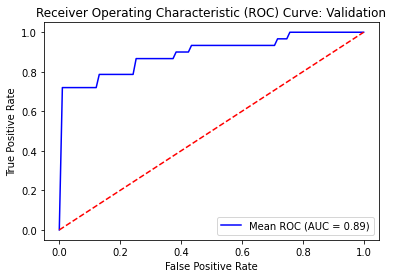

Mean Confusion Matrix:
[[6.8 1. ]
 [1.2 4.6]]
Cross-validation Accuracy Scores: [0.78571429 1.         0.85714286 0.84615385 0.69230769]
Mean Accuracy: 0.8362637362637363
Cross-validation f1 Scores: [0.76923077 1.         0.83333333 0.8        0.6       ]
Mean f1: 0.8005128205128205


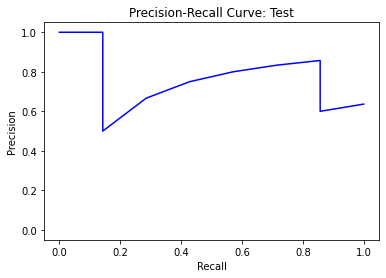

Accuracy Test: 0.8235294117647058
F1 Test: 0.7999999999999999
[[8 2]
 [1 6]]


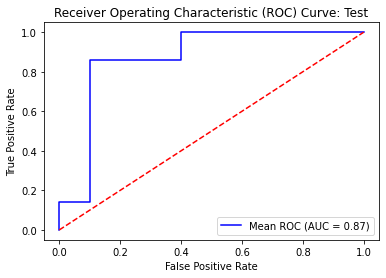

Feature Importance:
Eye_2Comp2_alpha: -1.6206505452770685
Head_2Comp1_theta: -1.2522383545299984
Head_1Comp2_alpha: -1.1810797462469922
Eye_2Comp1_theta: -0.9689549920958369
Eye_1Comp2_alpha: 0.9016708536119233
Eye_1Comp2_theta: 0.7236194491091376
Eye_2Comp1_alpha: -0.5860912694210794
Head_2Comp1_alpha: -0.3142380377330245
Head_2Comp2_alpha: -0.2749466597520731
Head_2Comp2_theta: -0.2552961364302504
Eye_1Comp1_alpha: 0.24432613962882943
Head_1Comp1_alpha: -0.23909560577882272
task_Read: 0.20217866829318815
task_Scan: -0.2021786682931176
Eye_1Comp1_theta: 0.20187846906578777
Eye_2Comp2_theta: 0.14641961641763396
fixation_ratio: -0.12408367325803482
Head_1Comp2_theta: 0.05819373548910489
Head_1Comp1_theta: 0.014907289191691514
fixation_length: -0.00036451198926101824
fixation_number: 4.897041662843549e-06


In [18]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

columns_to_exclude_2 = ['session_id', 'group']
columns_to_select_2 = df_fix.columns.difference(columns_to_exclude_2)
X = df_fix[columns_to_select_2]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
# svm_model = SVC(kernel='linear')
svm_model = SVC(kernel='linear')
# rf_classifier = RandomForestClassifier()
# knn_classifier = KNeighborsClassifier()
# dt_classifier = DecisionTreeClassifier()
# lr_classifier = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    svm_model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = svm_model.decision_function(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(svm_model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.decision_function(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

feature_importance = best_model.coef_[0]

# Map feature names to coefficients
feature_importance_dict = dict(zip(X_train_val.columns, feature_importance))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

## Random Forest / Decision Tree

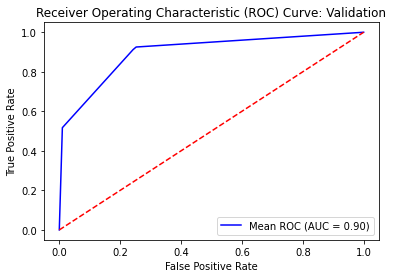

Mean Confusion Matrix:
[[7.  0.8]
 [0.6 5.2]]
Cross-validation Accuracy Scores: [0.85714286 1.         0.92857143 0.84615385 0.84615385]
Mean Accuracy: 0.8956043956043956
Cross-validation f1 Scores: [0.85714286 1.         0.90909091 0.8        0.83333333]
Mean f1: 0.87991341991342


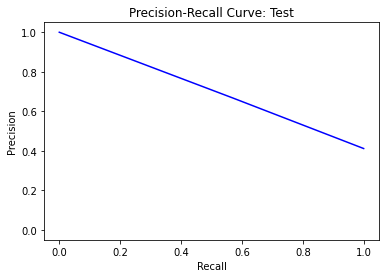

Accuracy Test: 0.7058823529411765
F1 Test: 0.6153846153846153
[[8 2]
 [3 4]]


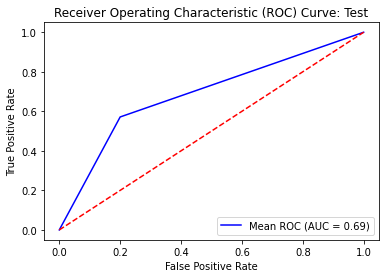

Eye_2Comp2_alpha: 0.19
Head_1Comp2_alpha: 0.17
fixation_ratio: 0.1
fixation_length: 0.09
Eye_2Comp1_alpha: 0.08
Head_1Comp1_alpha: 0.08
Head_2Comp1_theta: 0.04
Head_2Comp2_alpha: 0.04
Eye_1Comp2_alpha: 0.03
Head_2Comp1_alpha: 0.03
Head_2Comp2_theta: 0.03
Eye_1Comp2_theta: 0.02
Eye_2Comp1_theta: 0.02
Head_1Comp1_theta: 0.02
Head_1Comp2_theta: 0.02
Eye_1Comp1_alpha: 0.01
Eye_1Comp1_theta: 0.01
Eye_2Comp2_theta: 0.01
fixation_number: 0.01
task_Read: 0.0
task_Scan: 0.0


In [30]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

columns_to_exclude_2 = ['session_id', 'group']
columns_to_select_2 = df_fix.columns.difference(columns_to_exclude_2)
X = df_fix[columns_to_select_2]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
# svm_model = SVC(kernel='linear')
model = RandomForestClassifier(random_state = 42)
# rf_classifier = RandomForestClassifier()
# knn_classifier = KNeighborsClassifier()
# dt_classifier = DecisionTreeClassifier()
# lr_classifier = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.predict(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train_val.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

## KNN

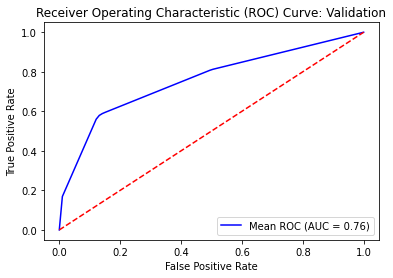

Mean Confusion Matrix:
[[6.4 1.4]
 [1.8 4. ]]
Cross-validation Accuracy Scores: [0.85714286 0.92857143 0.78571429 0.61538462 0.61538462]
Mean Accuracy: 0.7604395604395604
Cross-validation f1 Scores: [0.8        0.92307692 0.72727273 0.44444444 0.61538462]
Mean f1: 0.7020357420357419


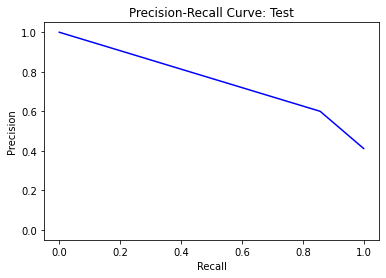

Accuracy Test: 0.7058823529411765
F1 Test: 0.7058823529411764
[[6 4]
 [1 6]]


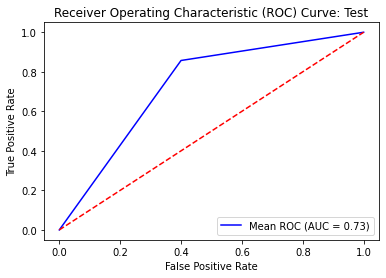

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [40]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

columns_to_exclude_2 = ['session_id', 'group']
columns_to_select_2 = df_fix.columns.difference(columns_to_exclude_2)
X = df_fix[columns_to_select_2]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
# svm_model = SVC(kernel='linear')
model = KNeighborsClassifier(n_neighbors=3)
# rf_classifier = RandomForestClassifier()
# knn_classifier = KNeighborsClassifier()
# dt_classifier = DecisionTreeClassifier()
# lr_classifier = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.predict(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

feature_importance = best_model.coef_[0]

# Map feature names to coefficients
feature_importance_dict = dict(zip(X_train_val.columns, feature_importance))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

## XGBoost

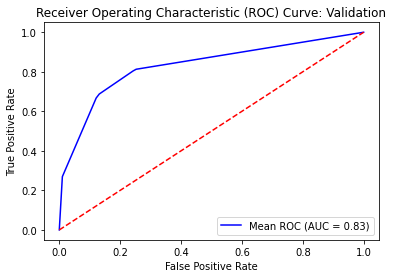

Mean Confusion Matrix:
[[7.  0.8]
 [1.4 4.4]]
Cross-validation Accuracy Scores: [0.85714286 0.85714286 0.85714286 0.76923077 0.84615385]
Mean Accuracy: 0.8373626373626373
Cross-validation f1 Scores: [0.85714286 0.83333333 0.8        0.66666667 0.8       ]
Mean f1: 0.7914285714285715


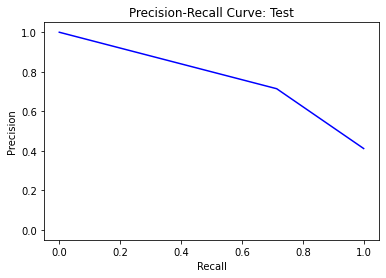

Accuracy Test: 0.7647058823529411
F1 Test: 0.7142857142857143
[[8 2]
 [2 5]]


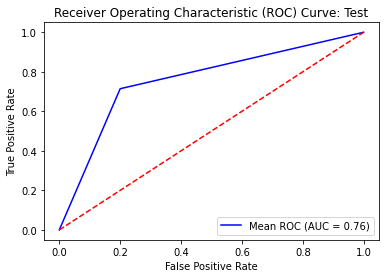

fixation_ratio: 0.3400000035762787
Eye_2Comp2_alpha: 0.18000000715255737
Head_1Comp2_alpha: 0.12999999523162842
Head_2Comp1_theta: 0.05999999865889549
Eye_1Comp2_theta: 0.05000000074505806
Head_2Comp1_alpha: 0.05000000074505806
fixation_length: 0.05000000074505806
Head_2Comp2_alpha: 0.03999999910593033
Eye_1Comp1_theta: 0.019999999552965164
Eye_2Comp1_alpha: 0.019999999552965164
Head_1Comp1_theta: 0.019999999552965164
fixation_number: 0.019999999552965164
Eye_1Comp1_alpha: 0.0
Eye_1Comp2_alpha: 0.0
Eye_2Comp1_theta: 0.0
Eye_2Comp2_theta: 0.0
Head_1Comp1_alpha: 0.0
Head_1Comp2_theta: 0.0
Head_2Comp2_theta: 0.0
task_Read: 0.0
task_Scan: 0.0


In [43]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

columns_to_exclude_2 = ['session_id', 'group']
columns_to_select_2 = df_fix.columns.difference(columns_to_exclude_2)
X = df_fix[columns_to_select_2]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
# svm_model = SVC(kernel='linear')
model = xgb.XGBClassifier(tree_method="hist")
# rf_classifier = RandomForestClassifier()
# knn_classifier = KNeighborsClassifier()
# dt_classifier = DecisionTreeClassifier()
# lr_classifier = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.predict(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train_val.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

## Naive Bayes

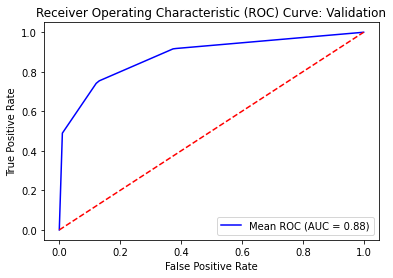

Mean Confusion Matrix:
[[7.  0.8]
 [0.8 5. ]]
Cross-validation Accuracy Scores: [0.92857143 1.         0.85714286 0.84615385 0.76923077]
Mean Accuracy: 0.8802197802197803
Cross-validation f1 Scores: [0.92307692 1.         0.8        0.8        0.76923077]
Mean f1: 0.8584615384615384


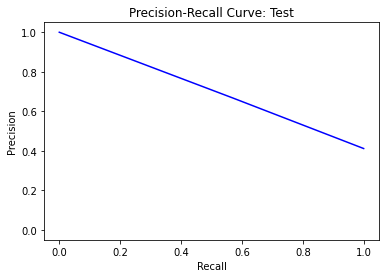

Accuracy Test: 0.7058823529411765
F1 Test: 0.6153846153846153
[[8 2]
 [3 4]]


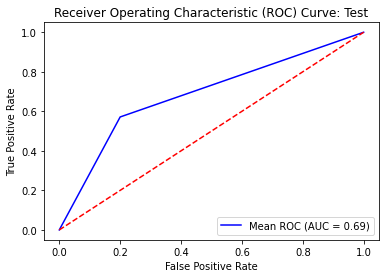

AttributeError: 'GaussianNB' object has no attribute 'coef_'

In [45]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

columns_to_exclude_2 = ['session_id', 'group']
columns_to_select_2 = df_fix.columns.difference(columns_to_exclude_2)
X = df_fix[columns_to_select_2]
y = df_fix['group']

# Encode the target variable into binary format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split into train/validation and test sets

X_train_val, X_test_main, y_train_val, y_test_main = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize SVM classifier
# svm_model = SVC(kernel='linear')
model = GaussianNB()
# rf_classifier = RandomForestClassifier()
# knn_classifier = KNeighborsClassifier()
# dt_classifier = DecisionTreeClassifier()
# lr_classifier = LogisticRegression()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results for each fold
conf_matrices = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv_scores_acc = []
cv_scores_f1 = []
best_model = None
best_f1 = 0

for train_index, test_index in cv.split(X_train_val, y_train_val):
    X_train, X_test = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
    y_train, y_test = y_train_val[train_index], y_train_val[test_index]

    # Apply SMOTE to balance the training set for each fold
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the balanced training set
    model.fit(X_resampled, y_resampled)

    # Predict on the test set and calculate scores
    y_pred = model.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred > 0)
    cv_scores_acc.append(fold_accuracy)
    fold_f1 = f1_score(y_test, y_pred > 0)
    cv_scores_f1.append(fold_f1)
    
    # Check if the metric is best for the current model and save it
    if fold_f1 > best_f1:
        best_f1 = fold_f1
        best_model = deepcopy(model)

    # Calculate confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred > 0)
    conf_matrices.append(conf_matrix)

    # Calculate ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Aggregate results across folds
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Validation')
plt.legend(loc='lower right')
plt.show()

print("Mean Confusion Matrix:")
print(mean_conf_matrix)

cv_scores_acc = np.array(cv_scores_acc)
cv_scores_f1 = np.array(cv_scores_f1)

print("Cross-validation Accuracy Scores:", cv_scores_acc)
print("Mean Accuracy:", cv_scores_acc.mean())

print("Cross-validation f1 Scores:", cv_scores_f1)
print("Mean f1:", cv_scores_f1.mean())

# Predict for test set
y_pred = best_model.predict(X_test_main)
test_accuracy = accuracy_score(y_test_main, y_pred > 0)
test_f1 = f1_score(y_test_main, y_pred > 0)

conf_matrix = confusion_matrix(y_test_main, y_pred > 0)
fpr, tpr, _ = roc_curve(y_test_main, y_pred)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test_main, y_pred)

# Plot Precision-Recall curve for test
plt.figure()
plt.plot(recall, precision, color='b')
plt.plot([0, 0], [0, 0], color='r', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Test')
# plt.legend(loc='lower right')
plt.show()


print("Accuracy Test:", test_accuracy)
print("F1 Test:", test_f1)
print(conf_matrix)

# Plot ROC curve for test
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Test')
plt.legend(loc='lower right')
plt.show()

feature_importance = best_model.coef_[0]

# Map feature names to coefficients
feature_importance_dict = dict(zip(X_train_val.columns, feature_importance))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")